In [36]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', 200)

In [37]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col="date", parse_dates=True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [38]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [39]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(df.index, df['value'], 'r', linewidth=1)
    ax.set_title("Daily FreeCodeCamp Forum Page Views")
    ax.set_xlabel('date')
    ax.set_ylabel('Page Views')

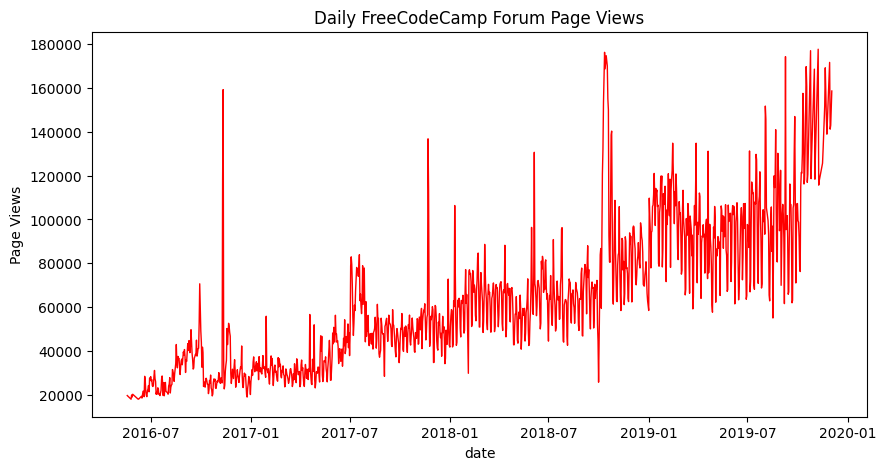

In [40]:
draw_line_plot()

In [41]:
def draw_bar_plot():
    df_bar = df.copy()
    df_bar['Month'] = df_bar.index.month
    df_bar['Year'] = df_bar.index.year
    df_bar = df_bar.groupby(['Year', 'Month'])['value'].mean()
    df_bar = df_bar.unstack()
    
    fig = df_bar.plot.bar(legend=True, figsize=(10,5), ylabel='Average Page Views', xlabel='Years').figure
    plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    

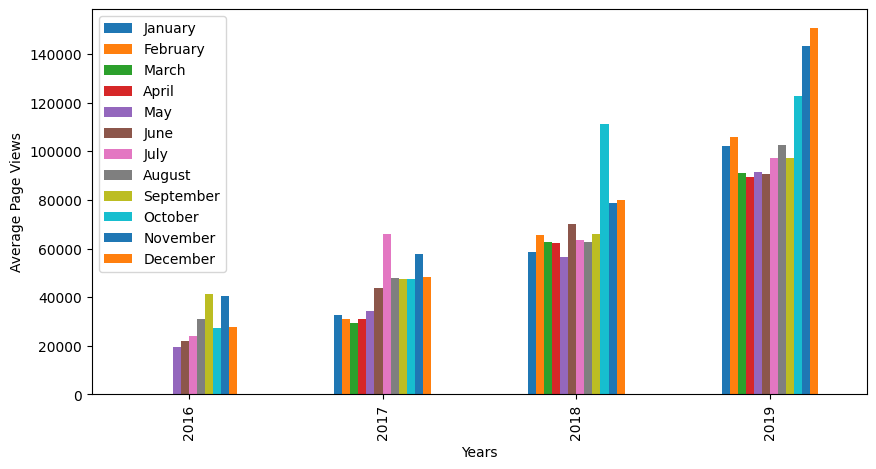

In [42]:
draw_bar_plot()

In [44]:
def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
    fig, ax = plt.subplots(1,2, figsize=(32,10), dpi=100)
    
    sns.boxplot(data=df_box, x='year', y='value', ax=ax[0])
    ax[0].set_title("Year-wise Box Plot (Trend)")
    ax[0].set_xlabel("Year")
    ax[0].set_ylabel("Page Views")
    
    month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    sns.boxplot(data=df_box, x="month", y="value", order=month_order, ax=ax[1])
    ax[1].set_title("Month-wise Box Plot (Seasonality)")
    ax[1].set_xlabel("Month")
    ax[1].set_ylabel("Page Views")
  

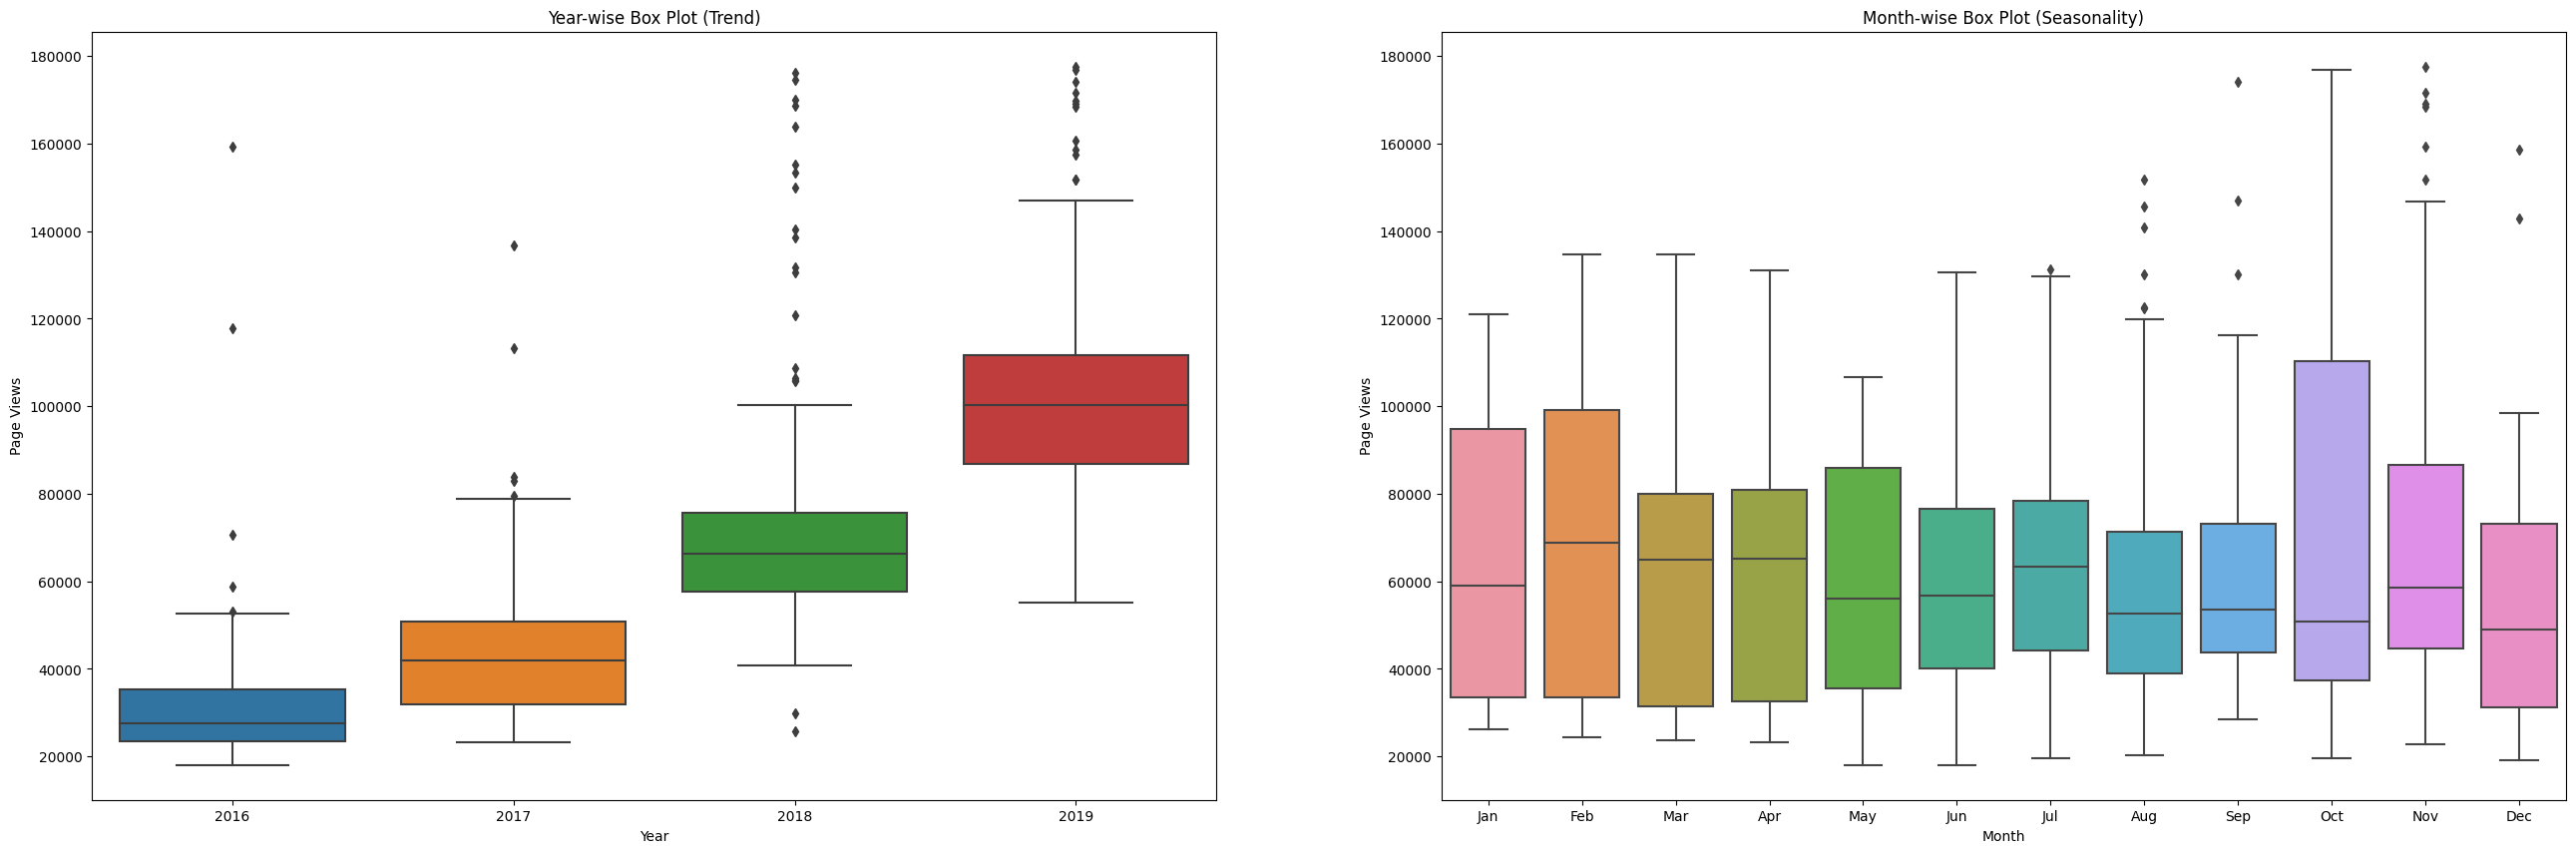

In [45]:
draw_box_plot()